## DATA ANALYSIS USING BOLLYWOOD DATASET

Performing Data Analysis on Bollywood CSV dataset

We intend to find inbuilt relationships among the attributes of each movie.<br>
The attributes that we are taking into consideration are:
- ReleaseTime
- Genre
- Budget
- BoxOfficeCollection
- YoutubeViews
- YoutubeLikes
- YoutubeDislikes

In [5]:
#importing all the required libraries at the beginning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading the csv file
df = pd.read_csv(r"C:\\Users\dse\Downloads\bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [7]:
#Question 1

#How many records are present in the dataset?
#Creating a variable records and finding the max of the serial number to find the number of records.
records = df['SlNo'].max(axis=0)
records

149

In [112]:
#Question 2

#How many movies got released in each Release Time? Sort number of releases in each Release Time in descending order.
time=df["ReleaseTime"].value_counts(ascending=False)
time

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

In [20]:
#Question 3

#Which genre had highest number of releases?

gen=df["Genre"].value_counts(ascending=False)
gen

#creating a genre dictionary
gen=df.Genre.value_counts()
gend = dict(gen)
print(gen.idxmax());

Comedy


Question 4<br>
How many movies in each genre got released in different release times like long weekend, festive season, etc. 

In [21]:
#(Note: Do a cross tabulation between Genre and ReleaseTime.)
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [22]:
#Question 5
df["Month"] = df.apply(lambda _: '', axis=1)
for r in range (records):
    splitLst = df["Release Date"][r].split("-")
    df["Month"][r] = splitLst[1]
df

<ipython-input-22-05fd1e4e3f71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"][r] = splitLst[1]


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar


In [23]:
a=df.Month.value_counts()
ad = dict(a)
print(a.idxmin());

Dec


In [38]:
#Question 6

df1 = df.copy()
df1 = df1.filter(['Month', 'Budget'])

for i in range(records):
    if (df1.Budget[i] >= 25):
        df1 = df1.drop(i)
        
rCount = dict(df1["Month"].value_counts())
max(rCount, key = rCount.get)

'May'

In [61]:
#Question 7

df["ROI"] = df.apply(lambda _: '', axis=1)
for i in range (records):
    df["ROI"][i] = float((df.BoxOfficeCollection[i] - df.Budget[i])/df.Budget[i])
df

df2 = df.copy()
df2 = df2.filter(["MovieName", "ROI"])
df2.sort_values(by = ["ROI"], ascending=False).head(10)


<ipython-input-61-c79db6b63085>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROI"][i] = float((df.BoxOfficeCollection[i] - df.Budget[i])/df.Budget[i])


,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.5
87,Fukrey,6.24
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.5
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [135]:
#Question 8

df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
df.nlargest(n=10, columns=['ROI']).sort_values(by='ROI',ascending=False)['MovieName']
df.groupby(by=["ReleaseTime"])['ROI'].mean().sort_values(ascending=False)

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64

In [36]:
#Question 9

np.corrcoef(df.BoxOfficeCollection, df.YoutubeLikes)

array([[1.        , 0.68251659],
       [0.68251659, 1.        ]])

Text(0.5, 1.0, 'Correlation between Box Office Collection and Youtube Likes')

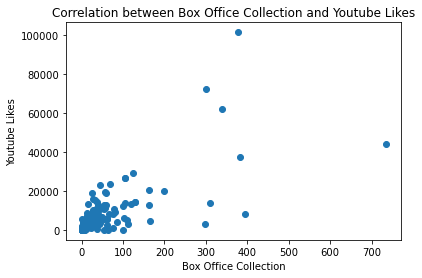

In [37]:
plt.scatter(df.BoxOfficeCollection, df.YoutubeLikes)
plt.xlabel("Box Office Collection")
plt.ylabel("Youtube Likes")
plt.title("Correlation between Box Office Collection and Youtube Likes")

<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

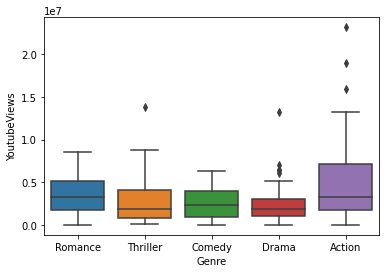

In [39]:
#Question 10
sns.boxplot(x = df.Genre, y = df.YoutubeViews)

In [42]:
df3 = df.copy()
df3 = df3.filter(["Genre","YoutubeViews"])
df3.groupby('Genre')['YoutubeViews'].sum()

Genre
Action      136611593
Comedy       91313029
Drama        93525532
Romance      86882563
Thriller     89017350
Name: YoutubeViews, dtype: int64

In [43]:
#Question 11
df.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000


<AxesSubplot:>

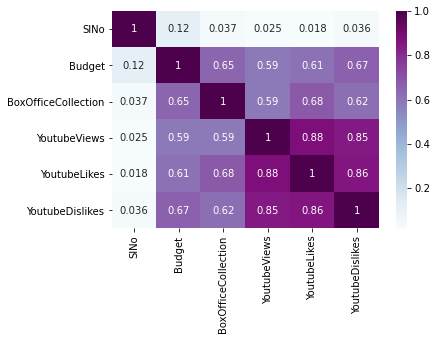

In [48]:
sns.heatmap(df.corr(), cmap="BuPu", annot=True)

Text(0.5, 1.0, 'Genre Wise Box Office Collection')

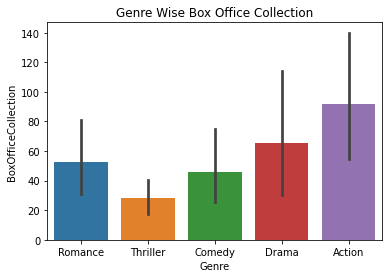

In [79]:
#Question 12
df4 = df.copy()
for i in range (m):
    k = df4["Release Date"][i].split("-")[2]
    if(k != "13" or k != "14" or k != "15"):
        continue
    df4 = df4.drop(i)

sns.barplot(x = df4.Genre, y = df4.BoxOfficeCollection)
plt.title("Genre Wise Box Office Collection")

In [82]:
df["Year"] = df.apply(lambda _: '', axis=1)
for r in range (records):
    splitLst = df["Release Date"][r].split("-")
    df["Year"][r] = splitLst[2]
df

<ipython-input-82-7edbf1e7938c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"][r] = splitLst[2]


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,Year,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,14,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,13,0.2
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,14,-0.6
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,13,-0.95
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,14,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,15,1.0
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,15,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,15,-0.625
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,15,1.378


In [95]:
#Question 13
df5 = df.copy()
df5["Year"] = df.apply(lambda _: '', axis=1)
for i in range (records):
    k = int(df["Release Date"][i].split("-")[2])
    df5["Year"][i] = k

df5 = df5.filter(["Genre", "Budget", "BoxOfficeCollection"])
df5 = df5.groupby('Genre')['Budget', 'BoxOfficeCollection'].sum()
df5

<ipython-input-95-b27c77f58f10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Year"][i] = k
<ipython-input-95-b27c77f58f10>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df5.groupby('Year')['Budget', 'BoxOfficeCollection'].sum()


,Budget,BoxOfficeCollection
Year,,
13,1778,3468.15
14,2287,4317.01
15,322,509.26


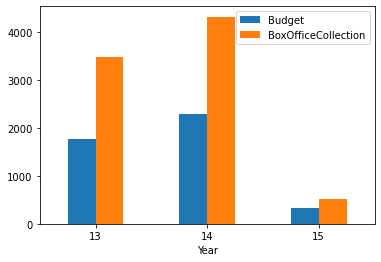

In [96]:
ax = df5.plot.bar(rot = 0)

Text(0.5, 1.0, 'Bar Chart')

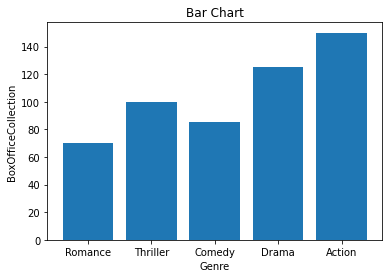

In [97]:
#Question 14
plt.bar(df.Genre, df.Budget)
plt.xlabel("Genre")
plt.ylabel("BoxOfficeCollection")
plt.title("Bar Chart")

In [98]:
#Question 15
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,Year,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,14,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,13,0.2
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,14,-0.6
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,13,-0.95
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,14,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,15,1.0
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,15,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,15,-0.625
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,15,1.378


In [101]:
df5 = df.filter(["Year", "YoutubeViews", "YoutubeLikes"])
df5 = df.groupby('Year')['YoutubeViews', 'YoutubeLikes'].sum()
df5

<ipython-input-101-a8fd1af998ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df.groupby('Year')['YoutubeViews', 'YoutubeLikes'].sum()


,YoutubeViews,YoutubeLikes
Year,,
13,150441529,324180
14,288378565,710142
15,58529973,139431


<AxesSubplot:ylabel='YoutubeLikes'>

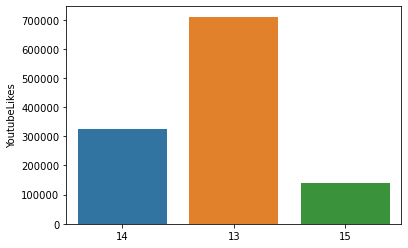

In [129]:
#Youtube Likes vs Year
sns.barplot(x = df.Year.unique(), y = df5.YoutubeLikes)

<AxesSubplot:ylabel='YoutubeViews'>

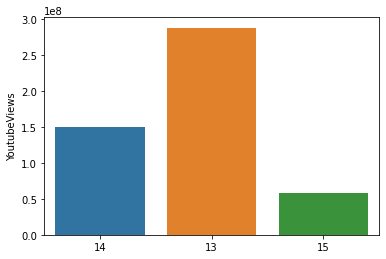

In [134]:
#Youtube Views vs Years
sns.barplot(x = df.Year.unique(), y = df5.YoutubeViews)